# SPLEX-Project 2020-2021 : Frog Calls 
-------
## 🐸 Step 2 : Predictory and classifications analysis of dataset 🐸
#### *Adrien Leroy and Antoine Auvergne*

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.svm import SVC

#### Key variables

In [3]:
dataset=pd.read_csv('../Anuran_Calls/Frogs_MFCCs.csv')
features=dataset.columns[1:-4]
labels=dataset.columns[-4:]
family,genus,species,id=labels

### A. Random Forest 🌳🌳🌳

#### Testing classification with all labels __Independently__

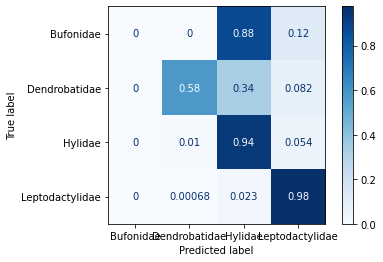

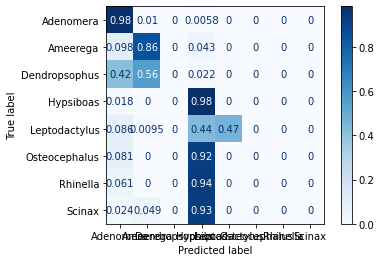

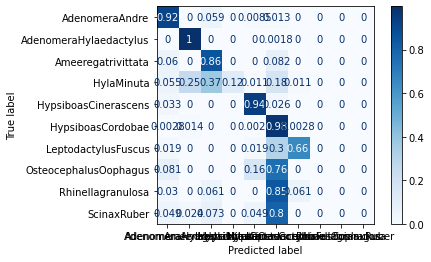

In [4]:
for label in labels[:-1]:
    x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                        dataset[label], 
                                                        test_size=0.33, 
                                                        random_state=42)



    Rfclf = RandomForestClassifier(max_depth=3, random_state=0)
    Rfclf.fit(x_train, y_train)

    y_predicted=Rfclf.predict(x_test)
    confusion_matrix(y_test,y_predicted)
    plot_confusion_matrix(Rfclf,x_test,y_test,cmap=plt.cm.Blues,
                                     normalize='true')

    plt.savefig("../images/confusionMatrixGeneral_"+str(label)+".png")


#### Creating the pipeline

In [5]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                    dataset[labels], 
                                                    test_size=0.33, 
                                                    random_state=42)


print("Classifying Families",'\n')
RfclfGeneral=RandomForestClassifier(max_depth=3, random_state=1)
RfclfGeneral.fit(x_train,y_train[family])


RfclfFamiliesRF=[]
RfclFamiliesLabels=[]

RfclfGenusRF=[]
RfclfGenusLabels=[]

print("Classifying Genus : ",'\n')

for label in np.unique(dataset[family]):
    print("Classifying "+str(label))
    
    #print(y_predicted.shape)
    #print(list(y_train[y_train[family]==label][genus]))
    #print(y_train[y_train[family]==label][genus])
    #print(np.unique(y_train[y_train[family]==label][genus]))
    
    RfclfTemp = RandomForestClassifier(max_depth=3, random_state=1)
    #print(list(y_train[y_train[family]==label][genus]))
    RfclfTemp.fit(x_train[y_train[family]==label],(y_train[y_train[family]==label][genus]))
    
    RfclFamiliesLabels.append(label)
    RfclfFamiliesRF.append(RfclfTemp)
    
RfclfFamilies=dict(zip(RfclFamiliesLabels,RfclfFamiliesRF))

print("\nClassifying Species : ",'\n')

for label in np.unique(dataset[genus]):
    print("Classifying "+str(label))
    
    #print(y_predicted.shape)
    #print(list(y_train[y_train[family]==label][genus]))
    #print(y_train[y_train[family]==label][genus])
    #print(np.unique(y_train[y_train[genus]==label][species]))
    
    RfclfTemp = RandomForestClassifier(max_depth=3, random_state=1)
    #print(list(y_train[y_train[family]==label][genus]))
    RfclfTemp.fit(x_train[y_train[genus]==label],(y_train[y_train[genus]==label][species]))
    
    RfclfGenusLabels.append(label)
    RfclfGenusRF.append(RfclfTemp)
    
RfclfGenus=dict(zip(RfclfGenusLabels,RfclfGenusRF))


Classifying Families 

Classifying Genus :  

Classifying Bufonidae
Classifying Dendrobatidae
Classifying Hylidae
Classifying Leptodactylidae

Classifying Species :  

Classifying Adenomera
Classifying Ameerega
Classifying Dendropsophus
Classifying Hypsiboas
Classifying Leptodactylus
Classifying Osteocephalus
Classifying Rhinella
Classifying Scinax


#### Predicting Results 🐸

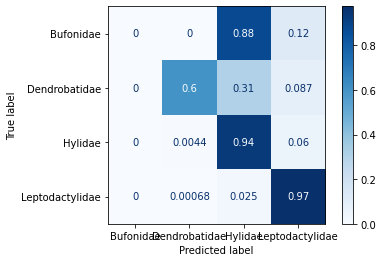

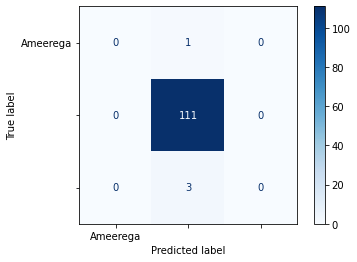

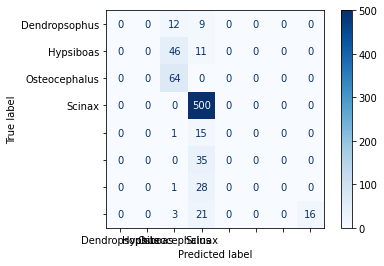

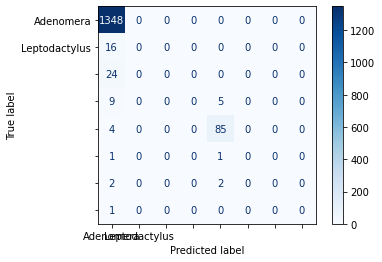

In [6]:
plot_confusion_matrix(RfclfGeneral,
                      x_test,
                      y_test[family],
                      cmap=plt.cm.Blues,
                      normalize='true')


y_predictedFamily=RfclfGeneral.predict(x_test)


for label in np.unique(y_predictedFamily):
    x_testTemp=x_test[y_predictedFamily==label]
    y_predictedGenusTemp=RfclfFamilies[label].predict(x_testTemp)
    
    plot_confusion_matrix(RfclfFamilies[label],
                      x_testTemp,
                      y_test[y_predictedFamily==label][genus],
                      cmap=plt.cm.Blues)

        


### SVM Classifier

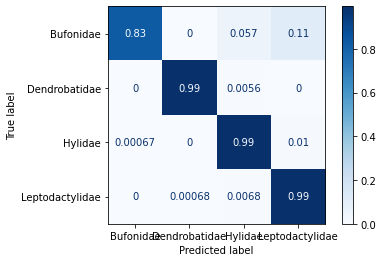

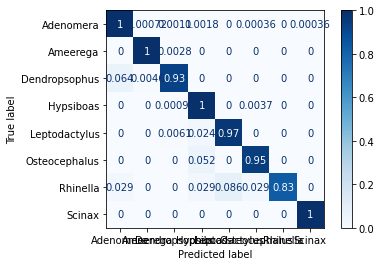

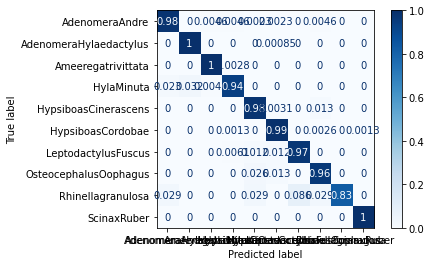

In [14]:
svc_clf=SVC()
svc_clf.fit(x_train,y_train[family])
plot_confusion_matrix(svc_clf,x_train,y_train[family],cmap=plt.cm.Blues,normalize='true')
svc_clf.fit(x_train,y_train[genus])
plot_confusion_matrix(svc_clf,x_train,y_train[genus],cmap=plt.cm.Blues,normalize='true')
svc_clf.fit(x_train,y_train[species])
plot_confusion_matrix(svc_clf,x_train,y_train[species],cmap=plt.cm.Blues,normalize='true')